In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Precalculation
The precalculation is performed on the basis of the following equation

$$
m \cdot \ddot{x} = T - D - m \cdot g
$$

where $m$ is the mass $\ddot{x}$ the acceleration $T$ the thrust and $D$ the drag.
The thrust for a rocket motor can be written as

$$
T = c_e \cdot \dot{m} \cdot \mu
$$

where $c_e$ is the exit velocity, $\dot{m}$ the mass flow ratem, and $\mu$ efficiency loss due to divergence at the nozzle as well as over or underexpansion.
The mass of the rocket can can be calculated as

$$
m = m_0 - \int_{t_0}^t \dot{m} \, \mathrm{d}\tau \;.
$$

Assuming a constant mass flow and $t_0 = 0$ the equation becomes

$$
m = m_0 - t \cdot \dot{m} \;.
$$

The drag can be modelled as

$$
D = C_D \cdot q \cdot S
$$

where $C_D$ is the drag coefficient, $q = \frac{1}{2} \rho v^2$ the dynamic pressure, and $S$ the reference wind area.

# Calculation of $\rho$

In [2]:
R = 287.05
g = 9.81

# rho in the troposphere
def rho_tropo(h):
    rho0 = 1.225 # kg / m³
    n = 1.235
    T0 = 288.15
    
    return rho0*(1.0 - ((n - 1.0)/n)*(g/(R*T0))*h)**(1.0/(n - 1.0))

# rho in the stratosphere
def rho_strato(h):
    rhoi = 0.3639
    hi = 11000.0
    Ti = 216.65
    
    return rhoi * np.exp(-(g/(R*Ti))*(h - hi))

def rho(h):
    if h < 11000:
        return rho_tropo(h)
    else:
        return rho_strato(h)

# Calculation of $D$

In [3]:
def drag(h, v, S, c_d):
    q = 0.5*rho(h)*v*v
    return q*S*c_d

# Simulation

In [4]:
dt = 1e-2 # s
c_d = 0.04 # max C_D coefficient
S = 40 # reference wing area m^2
g = 9.81
m_0 = 10000 # total initial mass kg
m_f = 6500 # fual mass in kg
c_e = 2530.98 # exit velocity in m/s
m_dot = 80 # mass flow kg/s
mu_b = 0.9 # burned fuel fraction used for take off and upright setting
m = m_0 * mu_b

a = [0]
v = [0]
h = [0]
t = [0]
q = [0]

while h[-1] >= 0.0:   
    if m <= (m_0 - m_f):
        m_dot = 0.0
        
    T = c_e * m_dot
    D = (-1)**(1 - int(v[-1] >= 0.0)) * drag(h[-1], v[-1], S, c_d)
    m -= dt*m_dot
    
    t.append(t[-1] + dt)
    a.append(T/m - D/m - g)
    h.append(h[-1] + dt*v[-1] + 0.5*a[-1]*dt*dt)
    v.append(v[-1] + dt*a[-1])
    q.append(0.5*rho(h[-1])*v[-1]**2)

In [5]:
a_g = np.array(a) / g

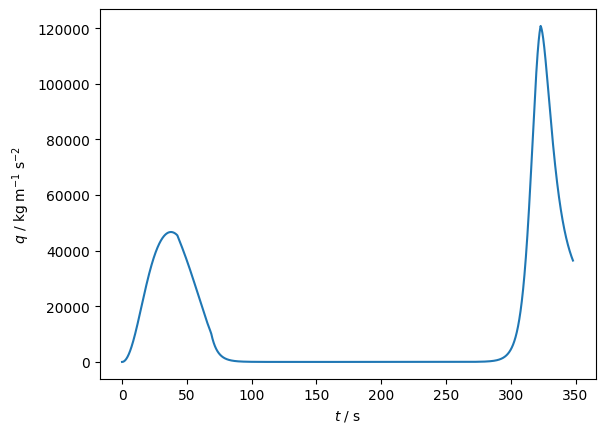

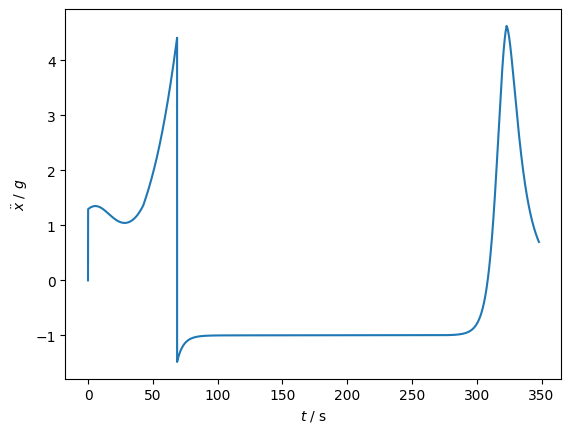

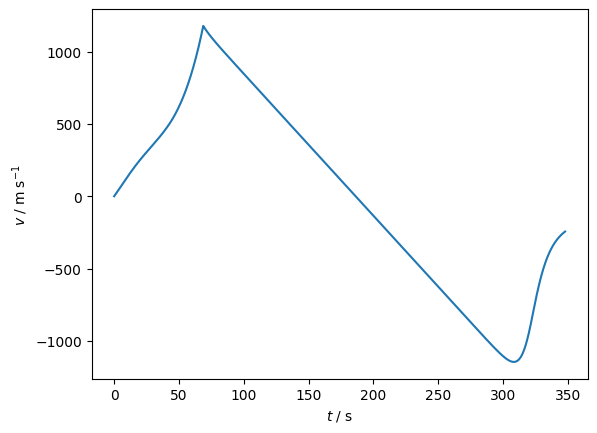

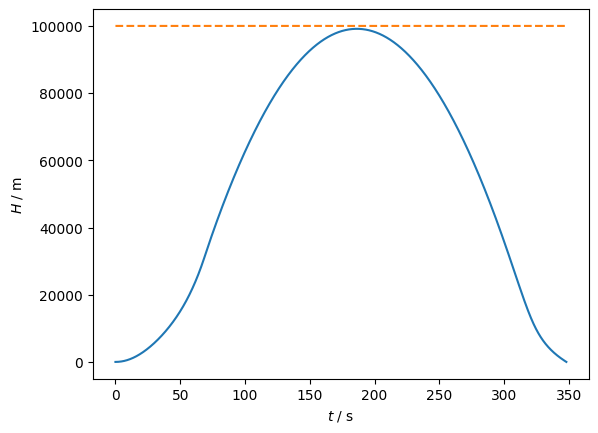

In [6]:
plt.plot(t, q)

plt.xlabel("$t$ / s")
plt.ylabel("$q$ / $\mathrm{kg}\; \mathrm{m}^{-1}\; \mathrm{s}^{-2}$")

plt.show()

plt.plot(t, a_g)

plt.xlabel("$t$ / s")
plt.ylabel("$\ddot{x}$ / $g$")

plt.show()

plt.plot(t, v)

plt.ylabel("$v$ / $\mathrm{m}\; \mathrm{s}^{-1}$")
plt.xlabel("$t$ / s")

plt.show()

plt.plot(t, h)

karman = 100000 * np.ones(len(t))
plt.plot(t, karman, "--")

plt.ylabel("$H$ / $\mathrm{m}\; $")
plt.xlabel("$t$ / s")

plt.show()